### The de Casteljau algorithm for computing points on a Bézier curve

Given the set of $p+1$ control points $\left\{ c_i \right\}_{i=0}^{p}$ we define the Bézier curve
$
\begin{equation}
    p(t) = \sum_{i=0}^{p} c_i B_i^p(u).
\end{equation}
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use("fivethirtyeight")

In [2]:
def deCasteljau(T, c_points, interval_start=0, interval_stop=1):
    """
    The de Casteljau algorithm.
    Given p + 1 control points c_points, computes the point on the bezier curve
    at parameter value T.
    """
    T = (interval_stop - T) / float(interval_stop - interval_start)
    c = c_points 
    p = len(c_points) - 1
    previous_step = np.array(c)

    for k in range(1, p+1):
        temp_step = np.zeros((p + 1 - k, 2))
        for j in range(0, p - k + 1):
            temp_step[j] = (1-T)*previous_step[j] + T * previous_step[j+1]
        previous_step = temp_step

    return previous_step[0]

In [6]:
def demo(n=5): 
    c = [(i, np.random.randint(-10, 10)) for i in range(n)]

    result = []
    for T in np.linspace(0, 1, 1000):
        result.append(deCasteljau(T, c))

    plt.plot(*zip(*result))
    plt.plot(*zip(*c), alpha=0.3, c='grey')
    plt.scatter(*zip(*c), s=100, zorder=10)
    plt.show()

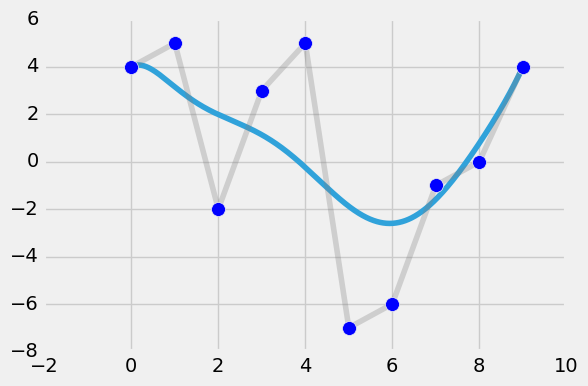

In [7]:
if __name__ == "__main__":
    demo(10)